# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

# Get request and jsonify
weather_response = requests.get(query_url)
weather_data = weather_response.json()

# Print a single response in order to inspect the returned JSON object
print(json.dumps(weather_data, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.0333,
        "lon": -4.2167
    },
    "dt": 1612075489,
    "id": 2641434,
    "main": {
        "feels_like": 273.9,
        "humidity": 88,
        "pressure": 1001,
        "temp": 276.3,
        "temp_max": 277.04,
        "temp_min": 275.93
    },
    "name": "Northam",
    "sys": {
        "country": "GB",
        "id": 2005965,
        "sunrise": 1612079701,
        "sunset": 1612112731,
        "type": 3
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 154,
        "gust": 3.13,
        "speed": 0.89
    }
}


In [19]:
# Perform a weather check on each city including the city number and name
# DataFrame lists (according to example in starter file)
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Variables for counting list items
record = 0
group = 1

units = "imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

print("Beginning Data Retrieval")
print("------------------------------------")
# Loop through API calls to get the desired data for each city in list created above
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    try:        
        response = requests.get(query_url).json()
        
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if record > 40:
            time.sleep(1.0)
            record = 1
            group += 1
            city_name.append(city)
        else:
            record += 1
            city_name.append(city)
        print(f"Processing City # {record} of Group # {group} | {city}")
        
    except (KeyError, IndexError):
        print("City not found. Skipping.....")
print("----------------------------------")
print("Data Retrieval Complete")

Beginning Data Retrieval
------------------------------------
Processing City # 1 of Group # 1 | jamestown
Processing City # 2 of Group # 1 | bambous virieux
Processing City # 3 of Group # 1 | vaini
Processing City # 4 of Group # 1 | grindavik
Processing City # 5 of Group # 1 | cherskiy
Processing City # 6 of Group # 1 | hobart
Processing City # 7 of Group # 1 | pokhara
Processing City # 8 of Group # 1 | laguna
Processing City # 9 of Group # 1 | saint george
Processing City # 10 of Group # 1 | bose
Processing City # 11 of Group # 1 | cap malheureux
Processing City # 12 of Group # 1 | bamnet narong
Processing City # 13 of Group # 1 | rikitea
Processing City # 14 of Group # 1 | cape town
Processing City # 15 of Group # 1 | ahipara
Processing City # 16 of Group # 1 | punta arenas
Processing City # 17 of Group # 1 | ames
Processing City # 18 of Group # 1 | sangmelima
Processing City # 19 of Group # 1 | ushuaia
Processing City # 20 of Group # 1 | ilebo
Processing City # 21 of Group # 1 | la

Processing City # 7 of Group # 5 | severo-kurilsk
City not found. Skipping.....
Processing City # 8 of Group # 5 | portmore
Processing City # 9 of Group # 5 | hasaki
Processing City # 10 of Group # 5 | neuquen
Processing City # 11 of Group # 5 | khvoynaya
Processing City # 12 of Group # 5 | buin
Processing City # 13 of Group # 5 | la ronge
Processing City # 14 of Group # 5 | shahreza
City not found. Skipping.....
Processing City # 15 of Group # 5 | beringovskiy
Processing City # 16 of Group # 5 | ilo
Processing City # 17 of Group # 5 | vuktyl
Processing City # 18 of Group # 5 | cidreira
Processing City # 19 of Group # 5 | mekhe
Processing City # 20 of Group # 5 | cedar lake
Processing City # 21 of Group # 5 | adzope
Processing City # 22 of Group # 5 | safranbolu
Processing City # 23 of Group # 5 | kaeo
Processing City # 24 of Group # 5 | puerto del rosario
Processing City # 25 of Group # 5 | fort nelson
Processing City # 26 of Group # 5 | washington
City not found. Skipping.....
Proces

Processing City # 18 of Group # 9 | koulamoutou
Processing City # 19 of Group # 9 | de-kastri
Processing City # 20 of Group # 9 | camana
Processing City # 21 of Group # 9 | ler
Processing City # 22 of Group # 9 | srirampur
Processing City # 23 of Group # 9 | sao miguel do araguaia
Processing City # 24 of Group # 9 | warrnambool
Processing City # 25 of Group # 9 | usinsk
City not found. Skipping.....
Processing City # 26 of Group # 9 | aliganj
Processing City # 27 of Group # 9 | basar
Processing City # 28 of Group # 9 | linxia
Processing City # 29 of Group # 9 | kalakamati
Processing City # 30 of Group # 9 | mangrol
Processing City # 31 of Group # 9 | zonguldak
Processing City # 32 of Group # 9 | labuhan
Processing City # 33 of Group # 9 | whitefish
Processing City # 34 of Group # 9 | alta floresta
Processing City # 35 of Group # 9 | umarkot
Processing City # 36 of Group # 9 | catabola
Processing City # 37 of Group # 9 | celendin
Processing City # 38 of Group # 9 | okha
Processing City 

Processing City # 26 of Group # 13 | srednekolymsk
Processing City # 27 of Group # 13 | tabou
Processing City # 28 of Group # 13 | izazi
Processing City # 29 of Group # 13 | high level
City not found. Skipping.....
Processing City # 30 of Group # 13 | erzin
Processing City # 31 of Group # 13 | tura
Processing City # 32 of Group # 13 | tautira
Processing City # 33 of Group # 13 | mayor pablo lagerenza
Processing City # 34 of Group # 13 | qiongshan
Processing City # 35 of Group # 13 | kintinku
Processing City # 36 of Group # 13 | zhuzhou
Processing City # 37 of Group # 13 | broken hill
Processing City # 38 of Group # 13 | kyshtovka
Processing City # 39 of Group # 13 | majene
City not found. Skipping.....
Processing City # 40 of Group # 13 | lakatoro
Processing City # 41 of Group # 13 | huandacareo
Processing City # 1 of Group # 14 | zorgo
City not found. Skipping.....
Processing City # 2 of Group # 14 | krasnyy chikoy
City not found. Skipping.....
Processing City # 3 of Group # 14 | bret

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Creating a dictionary of desired weather data of each city in order to transfrom into pandas DataFrame

city_data = {"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity,
            "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date}

weather_df = pd.DataFrame(city_data)
weather_df.to_csv(output_data_file, index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,21.0,73,90,6.91,US,1612075009
1,bambous virieux,-20.3428,57.7575,86.0,66,40,10.36,MU,1612075244
2,vaini,-21.2000,-175.2000,78.8,94,75,5.75,TO,1612075244
3,grindavik,63.8424,-22.4338,21.2,93,90,5.75,IS,1612075244
4,cherskiy,68.7500,161.3000,-35.3,83,0,0.54,RU,1612075020


In [25]:
# Print a statistical summary on the dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,6.060000e+02
mean,19.904086,21.721389,50.212013,70.933993,53.338284,8.377096,1.612075e+09
std,32.723445,90.120309,32.944825,21.154347,41.681033,5.914319,8.196110e+01
min,-54.800000,-179.166700,-48.420000,15.000000,0.000000,0.310000,1.612075e+09
25%,-6.706900,-59.413775,27.655000,62.000000,1.000000,3.950000,1.612075e+09
50%,23.716650,27.880400,62.600000,76.000000,70.500000,6.910000,1.612075e+09
75%,47.624975,101.355850,75.200000,87.000000,96.000000,11.500000,1.612075e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,36.840000,1.612075e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
# Checking the humidity column for any rows where the humidity is greater than 100%
weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace = True) 
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,21.00,73,90,6.91,US,1612075009
1,bambous virieux,-20.3428,57.7575,86.00,66,40,10.36,MU,1612075244
2,vaini,-21.2000,-175.2000,78.80,94,75,5.75,TO,1612075244
3,grindavik,63.8424,-22.4338,21.20,93,90,5.75,IS,1612075244
4,cherskiy,68.7500,161.3000,-35.30,83,0,0.54,RU,1612075020
...,...,...,...,...,...,...,...,...,...
601,hukeri,16.2333,74.6000,78.80,38,0,6.91,IN,1612075383
602,verkhnyaya toyma,62.2349,44.9985,17.74,96,100,8.39,RU,1612075383
603,grand forks,47.9417,-97.4337,23.00,100,90,5.75,US,1612075383
604,sampit,-2.5333,112.9500,90.63,54,100,2.84,ID,1612075384


In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace = False) 
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,21.0,73,90,6.91,US,1612075009
1,bambous virieux,-20.3428,57.7575,86.0,66,40,10.36,MU,1612075244
2,vaini,-21.2000,-175.2000,78.8,94,75,5.75,TO,1612075244
3,grindavik,63.8424,-22.4338,21.2,93,90,5.75,IS,1612075244
4,cherskiy,68.7500,161.3000,-35.3,83,0,0.54,RU,1612075020


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

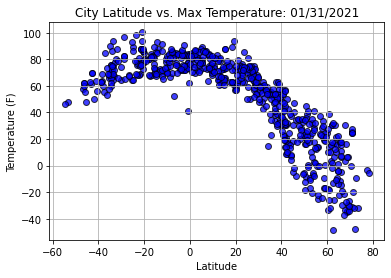

In [28]:
# Scatter plot displaying latitude vs. temperature
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add Table attritubutes
plt.title(f"City Latitude vs. Max Temperature: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/fig1.png")

## Latitude vs. Humidity Plot

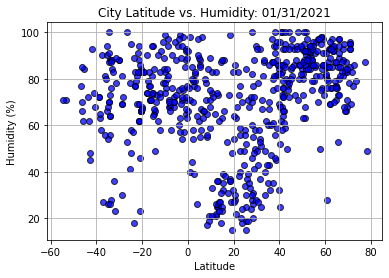

In [29]:
# Scatter plot displaying latitude vs. humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add Table attritubutes
plt.title(f"City Latitude vs. Humidity: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/fig2.png")

## Latitude vs. Cloudiness Plot

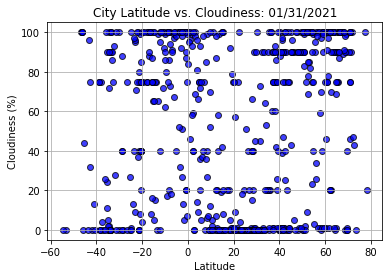

In [30]:
# Scatter plot displaying latitude vs. cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add Table attritubutes
plt.title(f"City Latitude vs. Cloudiness: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/fig3.png")

## Latitude vs. Wind Speed Plot

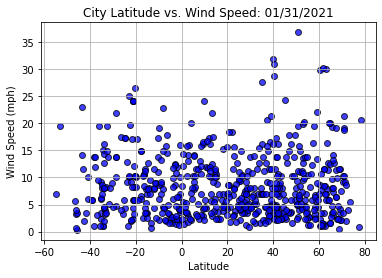

In [31]:
# Scatter plot displaying latitude vs. cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Add Table attritubutes
plt.title(f"City Latitude vs. Wind Speed: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/fig4.png")

## Linear Regression

In [35]:
# Creating dataframes for north and south hemisphere
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7779644535092273


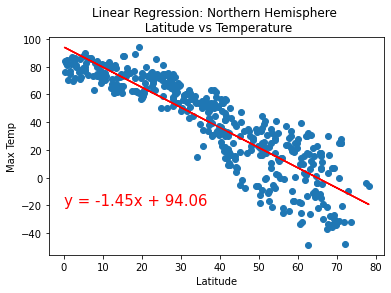

In [36]:
# x value
nlatx = north_df["Lat"]

# y value
nmax_tempy = north_df["Max Temp"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlatx, nmax_tempy)

# linear equation
regress_values = nlatx * slope + intercept

# linear equation print statement
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(nlatx,nmax_tempy)

# plot line and annotated equation
plt.plot(nlatx,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression: Northern Hemisphere \n Latitude vs Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1857590744674026


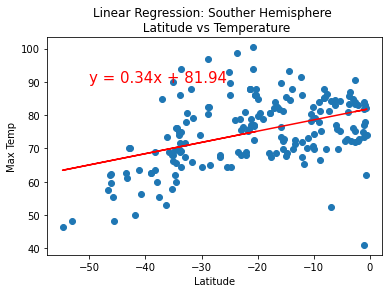

In [37]:
# x value
slatx = south_df["Lat"]

# y value
smax_tempy = south_df["Max Temp"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slatx, smax_tempy)

# linear equation
regress_values = slatx * slope + intercept

# linear equation print varible
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(slatx,smax_tempy)

# plot line and annotated equation
plt.plot(slatx,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression: Souther Hemisphere \n Latitude vs Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22690504283826904


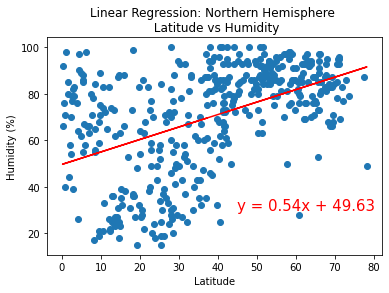

In [38]:
# x value
nlatxh = north_df["Lat"]

# y value
nhumy = north_df["Humidity"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlatxh, nhumy)

# linear equation
regress_values = nlatxh * slope + intercept

# line equation print variable
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(nlatxh,nhumy)

# plot line and annotated equation
plt.plot(nlatxh,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression: Northern Hemisphere \n Latitude vs Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04097510868086313


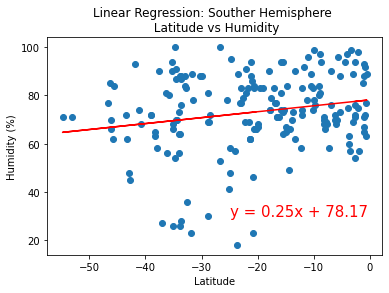

In [39]:
# x value
slatxh = south_df["Lat"]

# y value
shumy = south_df["Humidity"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slatxh, shumy)

# linear equation
regress_values = slatxh * slope + intercept

# linear equation print varibale
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(slatxh,shumy)

# plot line and annotated equation
plt.plot(slatxh,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression: Souther Hemisphere \n Latitude vs Humidity")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11393367420120103


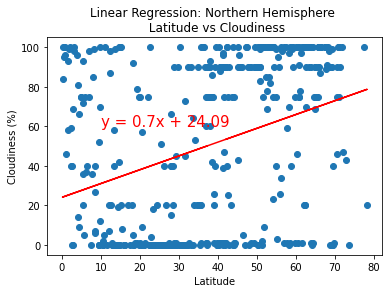

In [40]:
# x value
nlatxc = north_df["Lat"]

# y value
ncloudy = north_df["Cloudiness"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlatxc, ncloudy)

# linear equation
regress_values = nlatxc * slope + intercept

# linear equation print variable
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(nlatxc,ncloudy)

# plot line and annotated equation
plt.plot(nlatxc,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Linear Regression: Northern Hemisphere \n Latitude vs Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12266747960778866


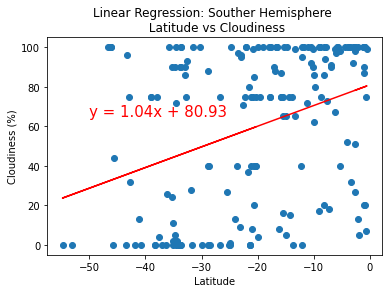

In [41]:
# x value
slatxc = south_df["Lat"]

# y value
scloudy = south_df["Cloudiness"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slatxc, scloudy)

# linear equation
regress_values = slatxc * slope + intercept

# linear equation print variable
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(slatxc,scloudy)

# plot line and annotated equation
plt.plot(slatxc,regress_values,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Linear Regression: Souther Hemisphere \n Latitude vs Cloudiness")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11393367420120103


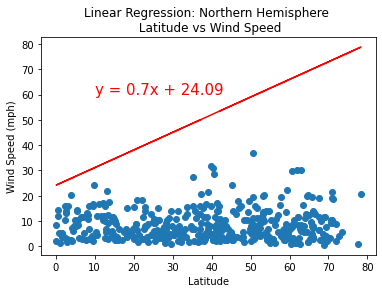

In [42]:
# x value
nlatxw = north_df["Lat"]

# y value
nwindy = north_df["Wind Speed"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlatxc, ncloudy)

# linear equation
regress_values = nlatxw * slope + intercept

# linear equation print variable
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(nlatxw,nwindy)

# plot line and annotated equation
plt.plot(nlatxw,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Linear Regression: Northern Hemisphere \n Latitude vs Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004833910220789022


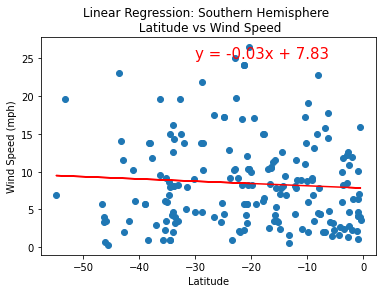

In [43]:
# x value
slatxw = south_df["Lat"]

# y value
swindy = south_df["Wind Speed"]

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(slatxw, swindy)

# linear equation
regress_values = slatxw * slope + intercept

# linear equation print variable
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot data points
plt.scatter(slatxw,swindy)

# plot line and annotated equation
plt.plot(slatxw,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")

# graph attributes
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Linear Regression: Southern Hemisphere \n Latitude vs Wind Speed")
print(f"The r-squared is: {rvalue**2}")
plt.show()